# Day 20

## Part 1

- it's hackin time!
- decription involves a process called mixing
    - a number is moved it's value many items forward or backward in a list
    - the list is ciruclar so numbers wrap at both ends
- numbers are moved in the order they originally appear in the file
- the coordinates for the star fruit grove are found by what the 1000th, 2000th and 3000th values are after the value 0 in the mixed list.
- Mix the list only once

`What is the sum of the three numbers that form the grove coordinates?`

In [169]:
from copy import deepcopy
from dataclasses import dataclass
from matplotlib import pyplot as plt
from utils import parse_from_file, ParseConfig

parser = ParseConfig('\n', int)

original_list = parse_from_file('day_20.txt', parser)

print(original_list[:10])

[9038, 7675, -2761, -5405, 7871, 9909, -2608, -7534, 6480, 2961]


In [170]:
@dataclass
class Item:
    value: int
    index: int

items = [Item(value, index) for index, value in enumerate(original_list)]

print(items[:5])

[Item(value=9038, index=0), Item(value=7675, index=1), Item(value=-2761, index=2), Item(value=-5405, index=3), Item(value=7871, index=4)]


In [171]:
def convert_to_list(item_list: list[Item]) -> list[int]:
    """
    creates a list of the values in order based on the item indecies
    """
    def key(item: Item) -> int:
        return item.index

    sorted_list = sorted(item_list, key=key)

    return [item.value for item in sorted_list]

In [172]:
# mix the list!
def mix_list(list_items: list[Item]) -> list[Item]:
    """
    returns a mixed version of a list of Items after 1 iteration
    """
    wrap_value = len(list_items) - 1
    for index, item in enumerate(list_items):
        # find new index and apply clamping to ensure it is within range
        new_index = (item.index + item.value)
        while new_index <= 0:
            new_index += wrap_value
        while new_index > wrap_value:
            new_index -= wrap_value
        # find range of values over which to modify indecies
        a, b = min(new_index, item.index), max(new_index, item.index)
        if new_index > item.index:
            offset = -1
            a += 1
            b += 1
        elif new_index < item.index:
            offset = 1
        else:  # value is zero
            continue
        # update other item's indecies
        for order, other_item in enumerate(list_items):
            if order == index:
                continue
            if a <= other_item.index < b:
                other_item.index += offset
        # finally update this item's index
        item.index = new_index
    return list_items

test_input = (1, 2, -3, 3, -2, 0, 4)
test_list = [
    Item(value, index) for index, value in enumerate(test_input)
]
mixed = mix_list(test_list)
print(convert_to_list(test_list), '->', convert_to_list(mixed))


[1, 2, -3, 4, 0, 3, -2] -> [1, 2, -3, 4, 0, 3, -2]


In [173]:
# now do it for real
mixed_items = mix_list(items)

In [174]:
# find 1000th, 2000th and 3000th items after item with value 0
for item in items:
    if item.value == 0:
        zero_index = item.index
        break
wanted_indecies = [1000 * value + zero_index for value in range(1, 3 + 1)]
print(wanted_indecies)
wanted_items = []
for item in items:
    if item.index in wanted_indecies:
        wanted_items.append(item)
    if len(wanted_items) == len(wanted_indecies):
        break
print(wanted_items)

[1894, 2894, 3894]
[Item(value=8879, index=3894), Item(value=6742, index=1894), Item(value=3938, index=2894)]


In [175]:
grove_coordinates = sum([item.value for item in wanted_items])

print(f'the grove coordinates\'s sum is: {grove_coordinates}')

the grove coordinates's sum is: 19559


## Part 2

- all values must be multiplied by `811589153` before beginning
- mixing must occur 10 times
- mixing still occurs in the same value order as the initial state

`What is the sum of the three numbers that form the grove coordinates?`

In [176]:
# let's get a fresh list of items
decryption_key = 811589153

# the value can be reduced to within the range since we can always extract
# the original index by looking at the index in the item list
decrypited_items = []
mod_value = len(original_list) - 1
for index, value in enumerate(original_list):
    decrypted_value = (value * decryption_key) % mod_value
    decrypited_items.append(Item(decrypted_value, index))

print(decrypited_items[:5])

[Item(value=1831, index=0), Item(value=2832, index=1), Item(value=4386, index=2), Item(value=4659, index=3), Item(value=2479, index=4)]


In [177]:
# time to mix!
mixing_steps = []
mixing_steps.append(convert_to_list(decrypited_items))
for iteration in range(1, 10 + 1):
    print(f'iteration: {iteration}', end='\r')
    decrypited_items = mix_list(decrypited_items)
    mixing_steps.append(convert_to_list(decrypited_items))

Text(0.5, 1.0, 'Some mixed results...')

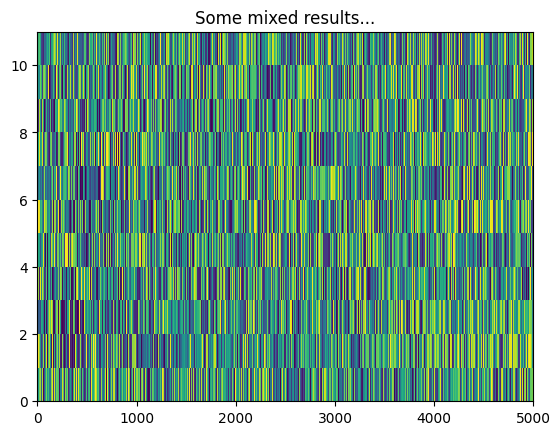

In [178]:
fig, ax = plt.subplots()
ax.pcolormesh(mixing_steps)
ax.set_title('Some mixed results...')

In [179]:
# find 1000th, 2000th and 3000th items after item with value 0
for item in decrypited_items:
    if item.value == 0:
        zero_index = item.index
        break
wanted_indecies = [
    (1000 * value + zero_index) % len(original_list)
    for value in range(1, 3 + 1)
]
print(wanted_indecies)
wanted_values = []
for original_index, item in enumerate(decrypited_items):
    if item.index in wanted_indecies:
        wanted_values.append(original_list[original_index] * decryption_key)
    if len(wanted_values) == len(wanted_indecies):
        break
print(wanted_values)

[1716, 2716, 3716]
[-1304223768871, -3867222314045, 6083672290888]


In [180]:
true_coordinates = sum([value for value in wanted_values])

print(f'the true drove coordinates\'s sum is: {true_coordinates}')

the true drove coordinates's sum is: 912226207972
